In [1]:
import warnings
from sklearn.cluster import AgglomerativeClustering
import os
warnings.filterwarnings('ignore')

In [2]:
from agglomerative_methods import Mod_Agglomerative
methods = Mod_Agglomerative()

In [3]:
df_scaled = methods.import_df('df_scaled.csv')
df_scaled.set_index('country', inplace = True)

In [4]:
df_scaled

,Unnamed: 0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,,
Afghanistan,0,1.293209,-1.151711,0.270184,-0.094941,-0.811210,0.156444,-1.617656,1.895761,-0.681962
Albania,1,-0.534110,-0.490567,-0.108379,0.059653,-0.378996,-0.311838,0.643728,-0.859864,-0.488736
Algeria,2,-0.268453,-0.108573,-0.983118,-0.659002,-0.224708,0.786497,0.666229,-0.040445,-0.468523
Angola,3,2.008247,0.769279,-1.468268,-0.178506,-0.588349,1.382492,-1.178880,2.120441,-0.519329
Antigua and Barbuda,4,-0.690524,0.152211,-0.299499,0.490011,0.097375,-0.600376,0.699981,-0.542670,-0.045687
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,162,-0.221281,0.192614,-0.586178,0.230960,-0.741598,-0.488745,-0.852611,0.362656,-0.549922
Venezuela,163,-0.521696,-0.472202,-0.711141,-1.235598,-0.037692,3.605651,0.542472,-0.317990,0.025332
Vietnam,164,-0.367764,1.125562,-0.001793,1.379973,-0.661597,0.408087,0.283706,-0.661618,-0.640607


In [5]:
df_scaled.drop(columns='Unnamed: 0', inplace=True)

#### Utilizaremos o método do cotovelo para averiguar o número ideal de clusters

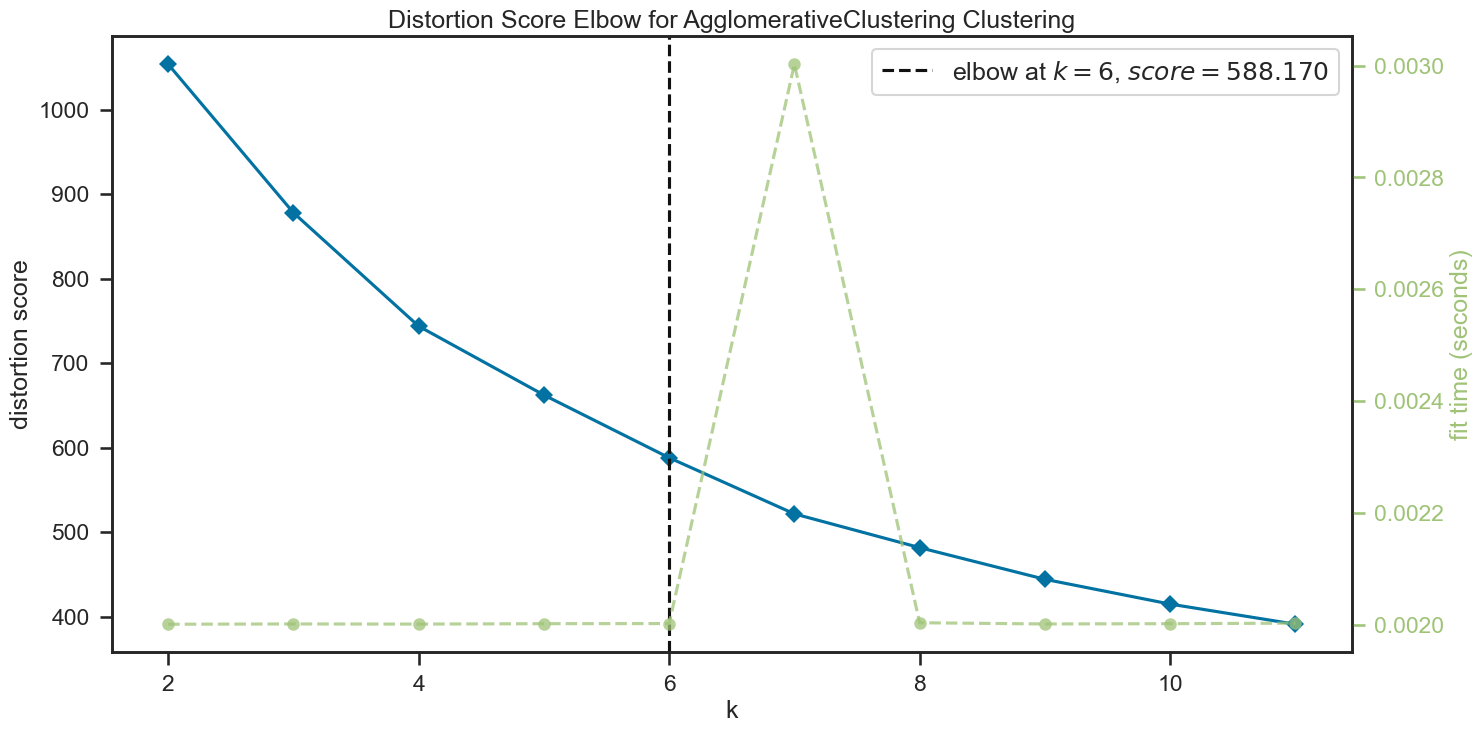

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
methods.best_clusters(df_scaled, AgglomerativeClustering())

O método sugere 6 clusters, mas nos foi pedido que usasse-mos apenas 3 e assim será feito.

In [7]:
clustering_hierarchical = methods.clustering_hierarchical(df_scaled, 3)
df_scaled['cluster_hierarchical'] = clustering_hierarchical
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_hierarchical
country,,,,,,,,,,
Afghanistan,1.293209,-1.151711,0.270184,-0.094941,-0.811210,0.156444,-1.617656,1.895761,-0.681962,1
Albania,-0.534110,-0.490567,-0.108379,0.059653,-0.378996,-0.311838,0.643728,-0.859864,-0.488736,2
Algeria,-0.268453,-0.108573,-0.983118,-0.659002,-0.224708,0.786497,0.666229,-0.040445,-0.468523,2
Angola,2.008247,0.769279,-1.468268,-0.178506,-0.588349,1.382492,-1.178880,2.120441,-0.519329,1
Antigua and Barbuda,-0.690524,0.152211,-0.299499,0.490011,0.097375,-0.600376,0.699981,-0.542670,-0.045687,2
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.221281,0.192614,-0.586178,0.230960,-0.741598,-0.488745,-0.852611,0.362656,-0.549922,1
Venezuela,-0.521696,-0.472202,-0.711141,-1.235598,-0.037692,3.605651,0.542472,-0.317990,0.025332,1
Vietnam,-0.367764,1.125562,-0.001793,1.379973,-0.661597,0.408087,0.283706,-0.661618,-0.640607,2


In [8]:
methods.count_clusters(df_scaled, 'cluster_hierarchical')

A quantidade de país no cluster 1 é 66.
A quantidade de país no cluster 2 é 66.
A quantidade de país no cluster 0 é 34.


In [9]:
methods.metrics_model(df_scaled, 3)

____________________________________________________________________________________________________
Índice de Davies-Boulding: 1.2139207873046616


In [10]:
df_scaled.reset_index(inplace=True)

____________________________________________________________________________________________________
A quantidade de países no CLUSTER 1 é 66 e são eles: 

 ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Iraq', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mongolia', 'Mozambique', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Turkmenistan', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Yemen', 'Zambia']
_________________________

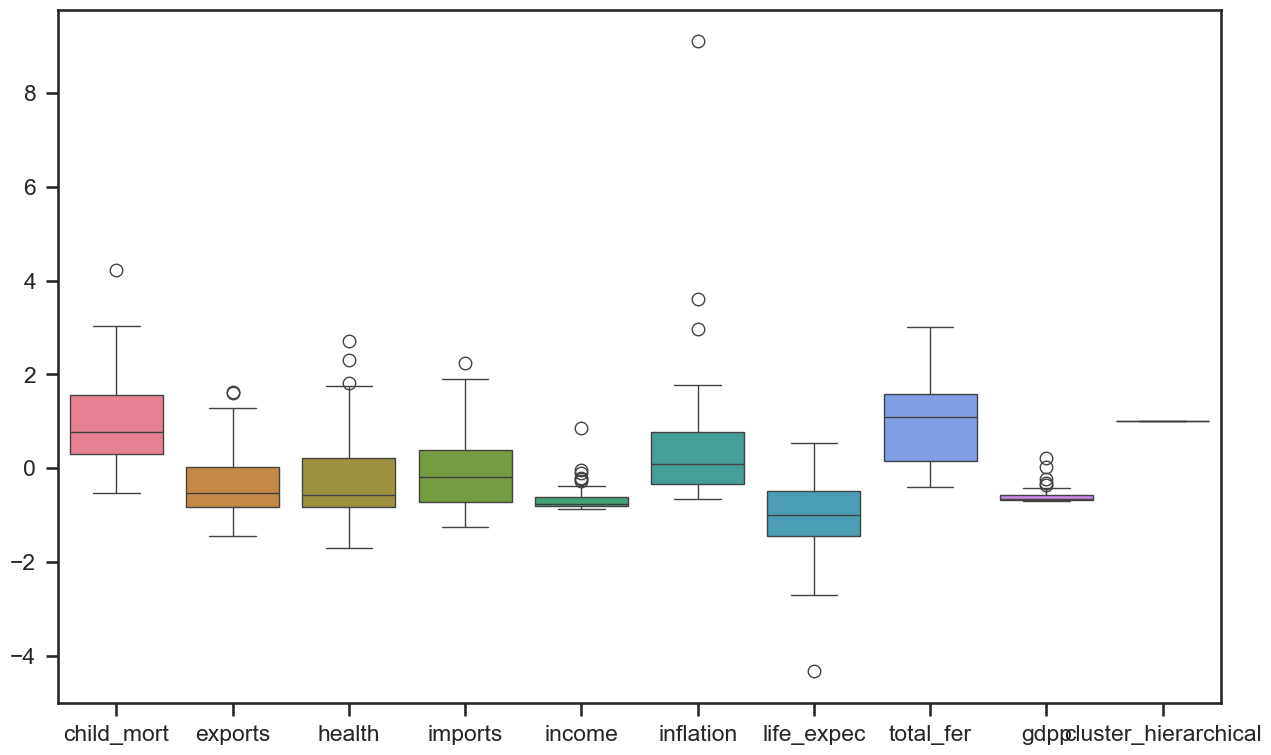

____________________________________________________________________________________________________
A quantidade de países no CLUSTER 2 é 66 e são eles: 

 ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Barbados', 'Belarus', 'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Georgia', 'Grenada', 'Guatemala', 'Hungary', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Romania', 'Russia', 'Samoa', 'Serbia', 'Seychelles', 'Slovak Republic', 'Slovenia', 'South Korea', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Thailand', 'Tonga', 'Tunisia', 'Turkey', 'Ukraine', 'Uruguay', 'Vietnam']
__________

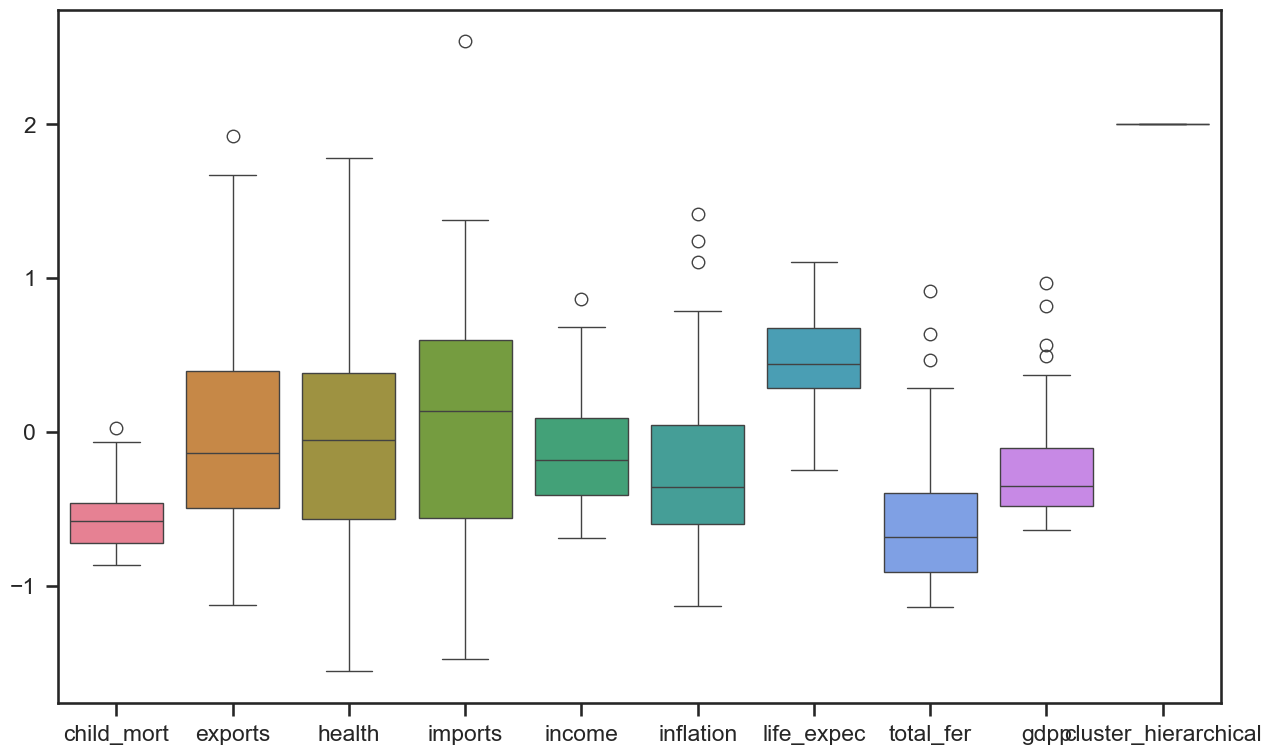

____________________________________________________________________________________________________
A quantidade de países no CLUSTER 0 é 34 e são eles: 

 ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Libya', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']
____________________________________________________________________________________________________
Estatísticas descritivas do CLUSTER 0

____________________________________________________________________________________________________
       child_mort    exports     health    imports     income  inflation  \
count   34.000000  34.000000  34.000000  34.000000  34.000000  34.000000   
mean    -0.798232   0.630028   0.608751   0.072

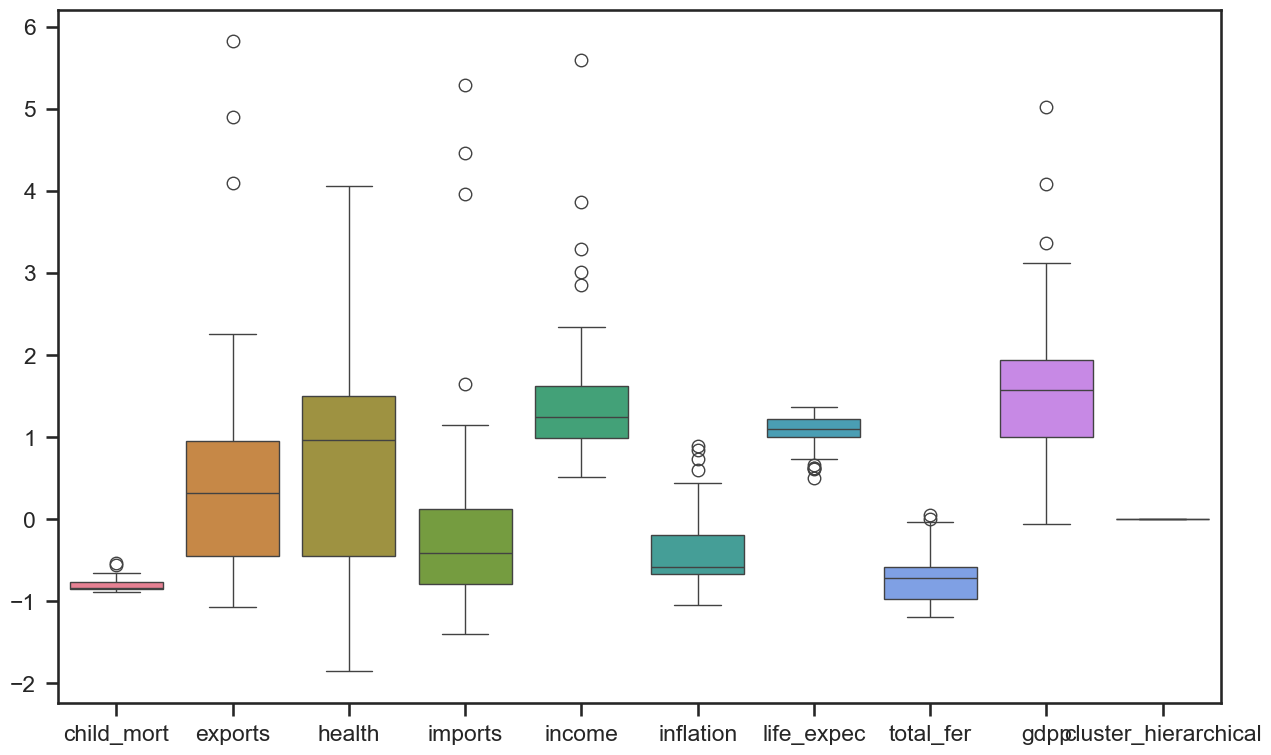

In [11]:
methods.report_clustering(df_scaled, 'cluster_hierarchical')

Na Preparação dos dados foi mostrado que existe uma correlação forte entre algumas variáveis, e isso certamente pode acarretar em um enviesamento com os resultados. Iremos aplicar o PCA para não haver perda significativa, e usaremos 6 componentes para analisar qual o percentual da base que o método vai representar

In [12]:
df_pca = methods.pca_method(df_scaled.drop(columns = 'country'), 6)

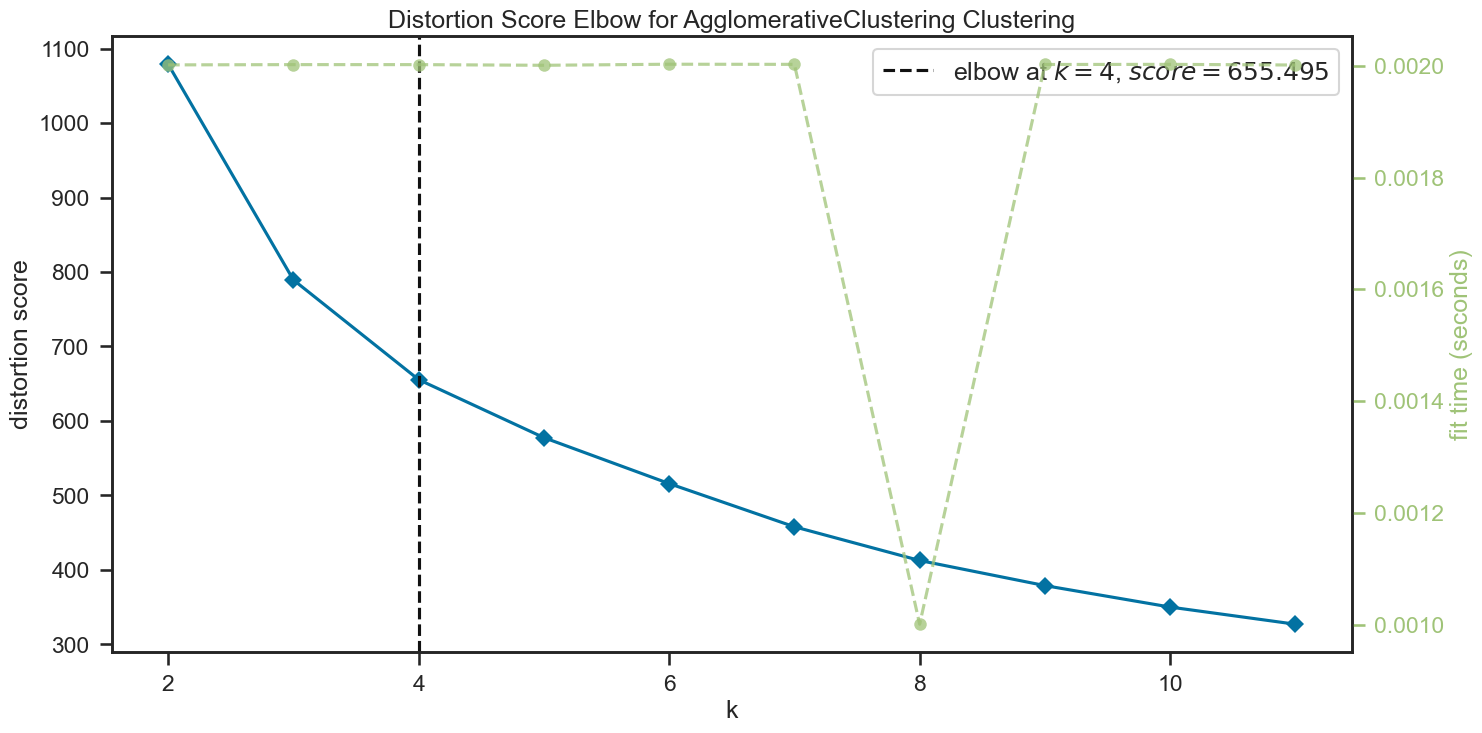

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
methods.best_clusters(df_pca, AgglomerativeClustering())

(<Figure size 800x550 with 2 Axes>, <Axes: >, <Axes: >)

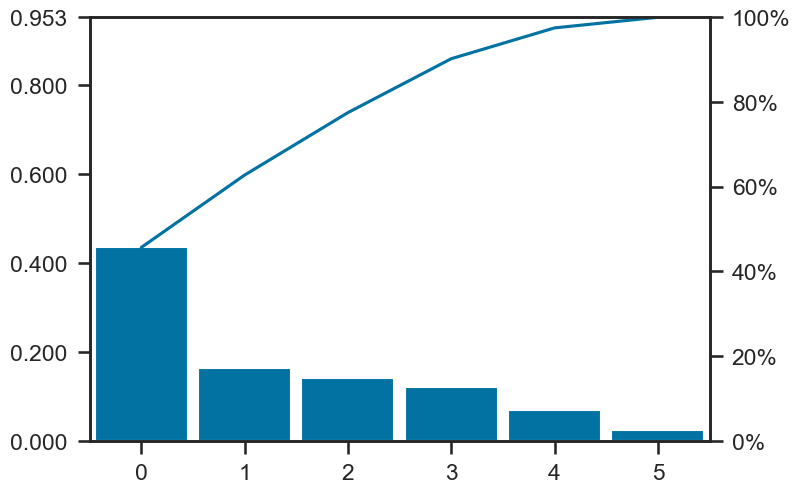

In [15]:
methods.pca_(df_scaled.drop(columns='country'), 6)

In [16]:
cluster_hierarchical_pca = methods.clustering_hierarchical(df_pca, 3)
df_pca['cluster_hierarchical_pca'] = cluster_hierarchical_pca
df_pca

,0,1,2,3,4,5,cluster_hierarchical_pca
0,-2.880773,0.090396,0.807903,-1.061901,-0.065009,-0.190244,1
1,0.324538,-0.668349,-1.441126,0.209622,0.032219,0.070790,2
2,-0.375635,-0.475147,-0.634890,1.554744,0.071283,-0.247021,2
3,-2.889904,1.775848,1.386268,1.052229,-0.142124,-0.343281,1
4,0.930763,0.071215,-1.205110,0.182769,-0.255845,-0.072416,2
...,...,...,...,...,...,...,...
161,-0.818284,0.622498,-0.523280,-0.167748,-0.548347,-0.207338,2
162,-0.536602,-1.158388,1.015017,3.000728,2.003879,-0.092492,1
163,0.390802,1.302262,-1.538828,0.252959,1.070073,0.000336,2
164,-1.867361,-0.077799,0.602486,1.007112,0.563324,-0.605794,1


In [18]:
methods.count_clusters(df_pca, 'cluster_hierarchical_pca')

A quantidade de país no cluster 2 é 81.
A quantidade de país no cluster 1 é 51.
A quantidade de país no cluster 0 é 34.


In [19]:
methods.metrics_model(df_pca.drop(columns='cluster_hierarchical_pca'), 3)

____________________________________________________________________________________________________
Índice de Davies-Boulding: 1.1315698712797309


In [20]:
df_pca['country'] = df_scaled['country']

____________________________________________________________________________________________________
A quantidade de países no CLUSTER 1 é 51 e são eles: 

 ['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mongolia', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Venezuela', 'Yemen', 'Zambia']
____________________________________________________________________________________________________
Estatísticas descritivas do CLUSTER 1

_______________________________________________________________________

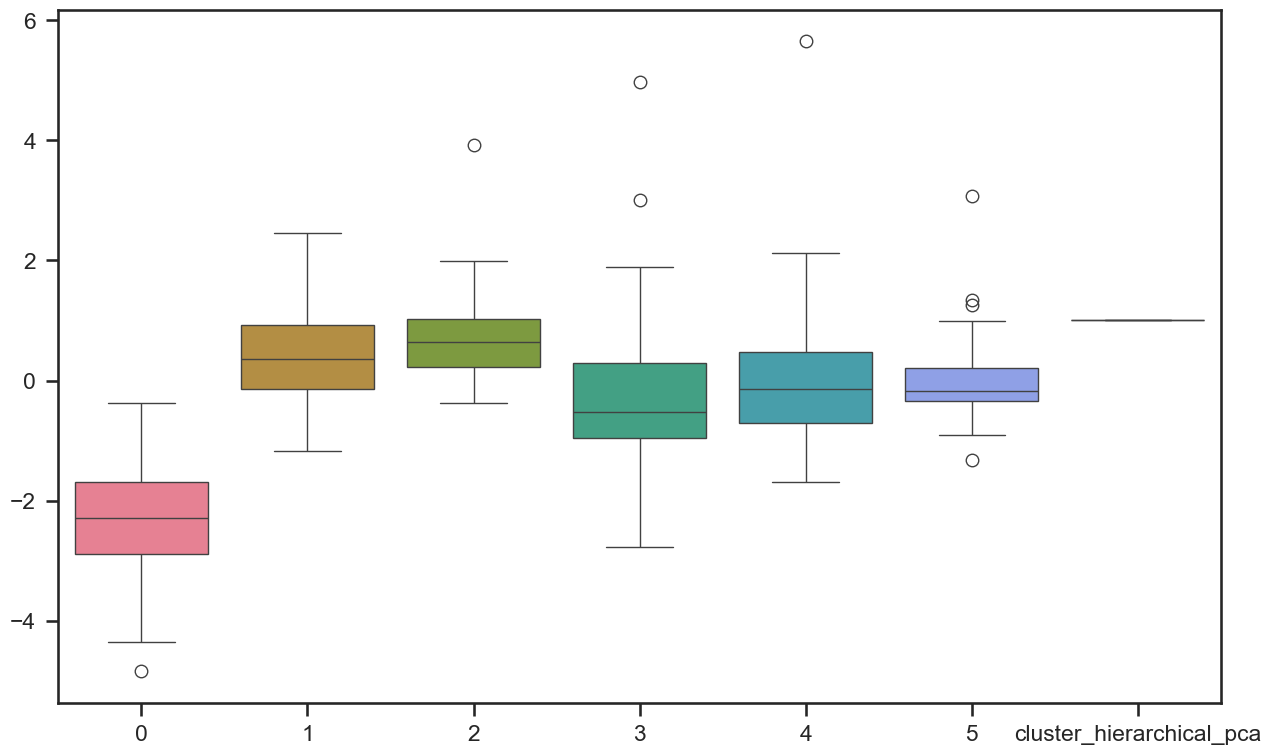

____________________________________________________________________________________________________
A quantidade de países no CLUSTER 2 é 81 e são eles: 

 ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco', 'Nepal', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Samoa', 'Serbia', 'Seychelles', 'Slovak Republic', 'Slovenia', 'Solomon Islands', 'South Korea',

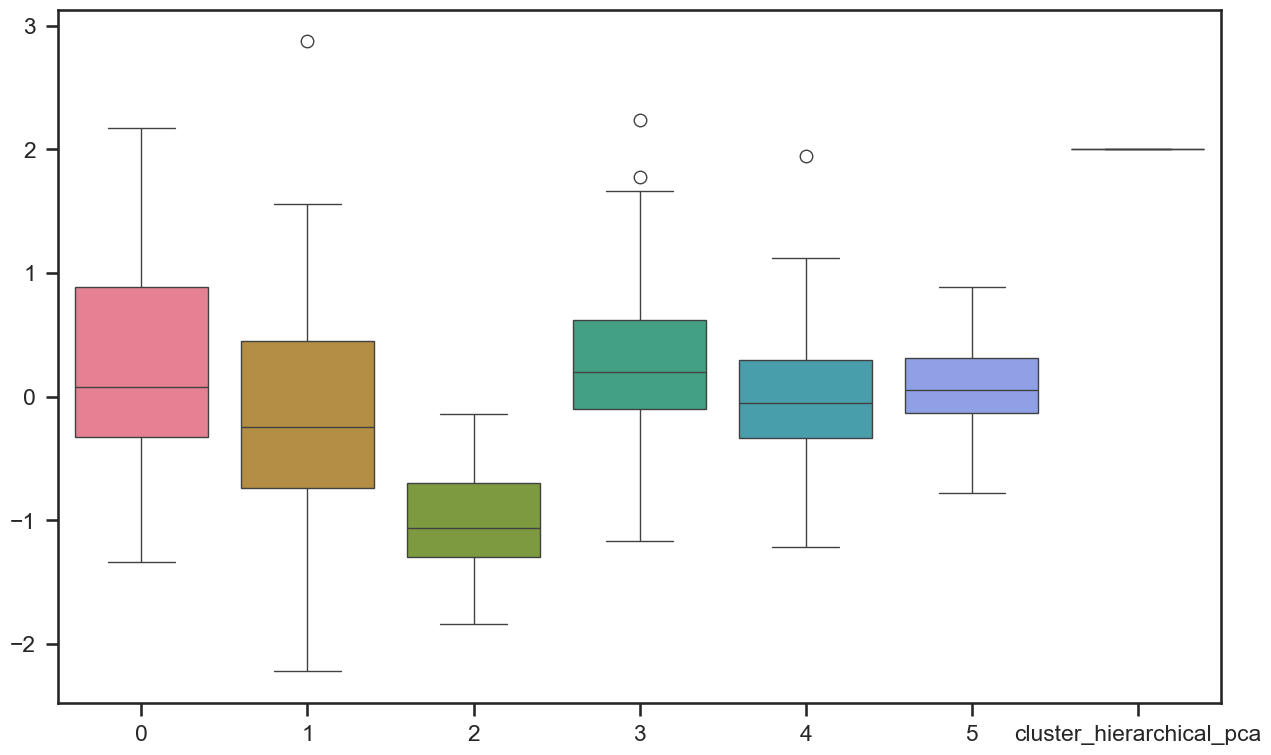

____________________________________________________________________________________________________
A quantidade de países no CLUSTER 0 é 34 e são eles: 

 ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Libya', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']
____________________________________________________________________________________________________
Estatísticas descritivas do CLUSTER 0

____________________________________________________________________________________________________
               0          1          2          3          4          5  \
count  34.000000  34.000000  34.000000  34.000000  34.000000  34.000000   
mean    2.806340  -0.170851   1.321521  -0.164642

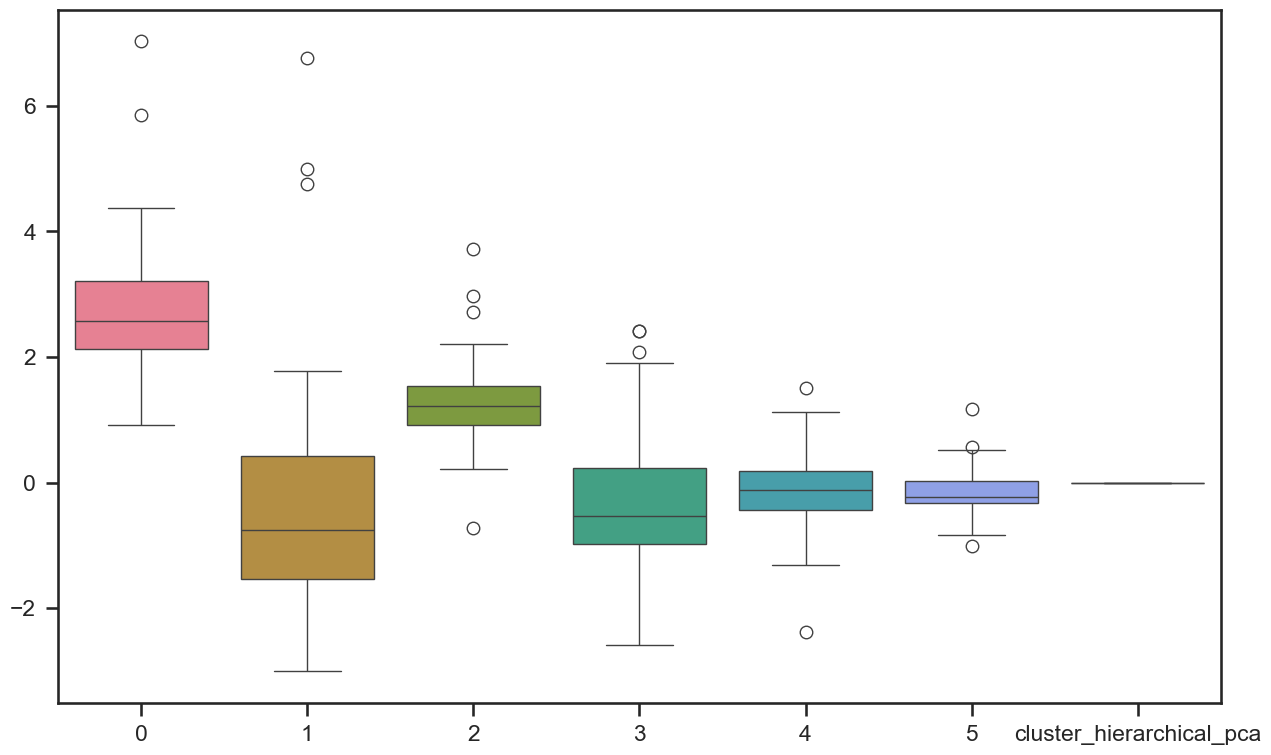

In [21]:
methods.report_clustering(df_pca, 'cluster_hierarchical_pca')

# Dendograma

#### Sem PCA

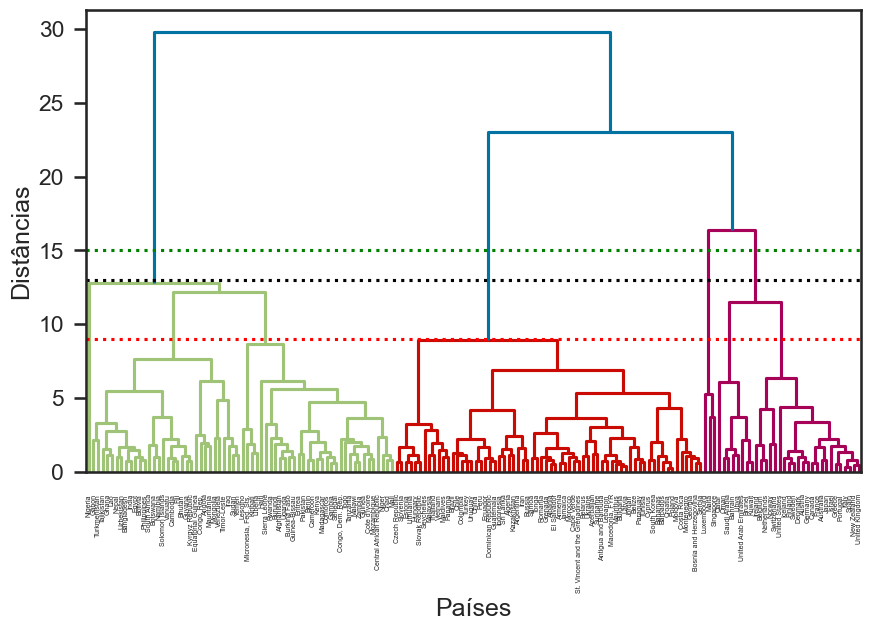

In [25]:
methods.dendogram_viz(df_scaled.set_index('country'), 'ward', 9, 13, 15)

#### Com PCA

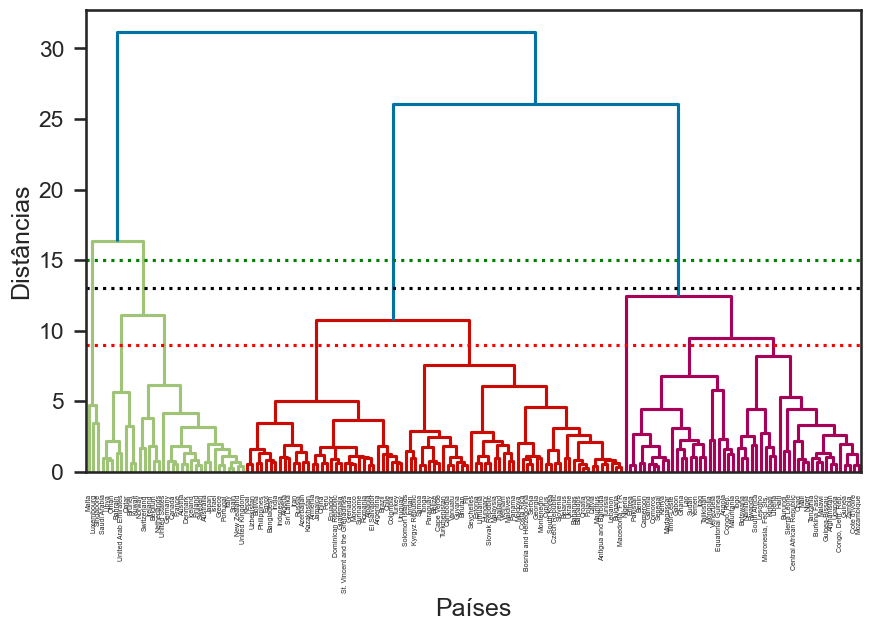

In [26]:
methods.dendogram_viz(df_pca.set_index('country'), 'ward', 9, 13, 15)

# Correlação Cophenética

A correlação cophenética é um conceito na área de análise de clusters, especialmente em métodos de aglomeração hierárquica. Ela é usada para avaliar quão bem as distâncias entre amostras (ou observações) são preservadas no dendrograma resultante de um algoritmo de agrupamento hierárquico.
Basicamente, a correlação cophenética é a correlação entre as distâncias originais entre todas as amostras e as distâncias entre as mesmas amostras conforme medidas no dendrograma.

In [27]:
df_best_point = df_scaled.set_index('country')

In [29]:
methods.cophenetic_index(df_pca.drop(columns='country'))

____________________________________________________________________________________________________
Correlação de cophenetic: 0.8762775627918306


#### Sem PCA

In [28]:
methods.best_point_numpy(df_best_point, 'cluster_hierarchical', 3)

O país com melhor ponto médio do cluster 0 é: FINLAND
O país com melhor ponto médio do cluster 1 é: GHANA
O país com melhor ponto médio do cluster 2 é: BULGARIA


#### Com PCA

In [30]:
df_best_point_pca = df_pca.set_index('country')

In [31]:
methods.best_point_numpy(df_best_point_pca, 'cluster_hierarchical_pca', 3)

O país com melhor ponto médio do cluster 0 é: FINLAND
O país com melhor ponto médio do cluster 1 é: TANZANIA
O país com melhor ponto médio do cluster 2 é: SURINAME


# Medóides

#### Sem PCA

In [34]:
methods.medoids(df_best_point, 'cluster_hierarchical')

O medóide do cluster 0 é: FINLAND
O medóide do cluster 1 é: GHANA
O medóide do cluster 2 é: BULGARIA


#### Com PCA

In [36]:
methods.medoids(df_best_point_pca, 'cluster_hierarchical_pca')

O medóide do cluster 0 é: FINLAND
O medóide do cluster 1 é: TANZANIA
O medóide do cluster 2 é: SURINAME
